In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from scipy.stats import chisquare

corrcoeff: [[ 1.         -0.86840477]
 [-0.86840477  1.        ]]
118.55966764917851 0.47408693173519073 0.14020630592207287 10.134209829546617 [1.52139944 0.00416574 0.02907539 1.09334246]
Chi^2: 193.74, dof: 20, reduced Chi^2: 9.69
Chi² = 193.7366111133431
Chi²/dof = 9.686830555667154
879.476662481965 -0.49295857095308393 81.69947899825333 [3.60214874e+01 2.42300297e-03 2.62890657e+01]


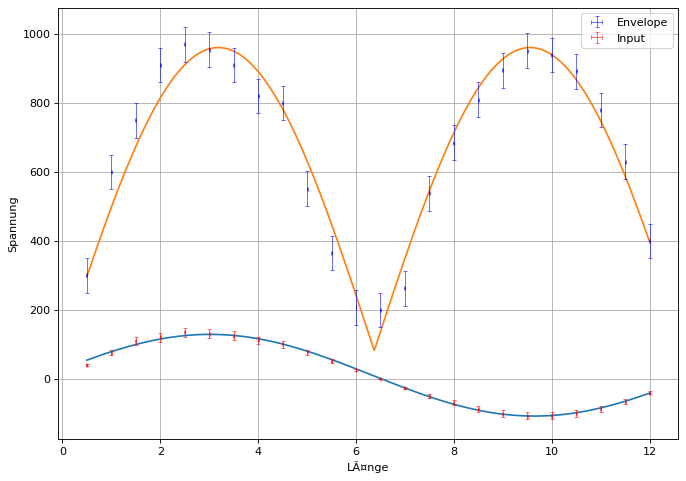

In [32]:
figure(figsize=(10,7), dpi=80)

Alen = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=0)
uenv = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=1)
duenv = [50]*len(uenv)
ui = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=2)
dui = abs(ui*0.1)

x=Alen
dx=[0.01]*len(Alen)

y1=uenv
dy1=duenv

y2=ui-0.022
dy2=dui

print(f'corrcoeff: {np.corrcoef(Alen,y2)}')
#def f(x,m,n):
#    return m*np.sin(n*x)

def g(x,m,n,a):
    return a+m*np.abs(np.sin(np.abs(n)*x))

def f(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi) + C

# --- fit ---
popt, pcov = curve_fit(
    f,
    x,
    y2,
    p0=[abs(np.max(y2)+np.min(y2))/2,  # amplitude guess
        .5,                  # frequency guess
        0.0,                  # phase guess
        np.mean(y2)],          # offset guess
)

perr = np.sqrt(np.diag(pcov))

# --- plot ---
xplot = np.linspace(min(x), max(x), 1000)

#popt, pcov=curve_fit(f,x,y2,p0=[abs(np.max(y2)-np.min(y2))/2,-0.8],sigma=dy2,absolute_sigma=True)
#perr=np.sqrt(np.diag(pcov))
plt.plot(xplot,f(xplot, *popt))

print(*popt,perr)
#print(chisquare(xplot,f_exp=f(xplot,*popt)))

#########################
# compute residuals

y_fit = f(x, *popt)
chi2 = np.sum(((y2 - y_fit) / dy2) ** 2)
dof = len(y2) - len(popt)
reduced_chi2 = chi2 / dof
print(f"Chi^2: {chi2:.2f}, dof: {dof}, reduced Chi^2: {reduced_chi2:.2f}")



residuals = y2 - f(x, *popt)

# use your measurement errors if you have them (dy)
# if not: assume dy = 1
#dy = dy2     # <-- use your actual uncertainties here

chi2 = np.sum(((y2 - f(x, *popt)) / dy2)**2)
dof = len(x) - len(popt)
print("Chi² =", chi2)
print("Chi²/dof =", chi2/dof)
'''
# chi-square
chi2 = np.sum((residuals / dy2)**2)

# degrees of freedom
N = len(y2)           # number of data points
p = len(popt)        # number of fitted parameters
dof = N - p

# reduced chi-square
chi2_red = chi2 / dof
print('INPUT')
print("chi²:", chi2)
print("dof:", dof)
print("reduced chi²:", chi2_red)
'''
#########################


popt, pcov=curve_fit(g,x,y1,p0=[1.3,0.87,3],sigma=dy1,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))
plt.plot(xplot,g(xplot,*popt))

print(*popt,perr)
#print(chisquare(x,f_exp=g(x,*popt)))


plt.errorbar(x,y1,xerr=dx,yerr=dy1, ls='none', capsize=2,elinewidth=0.5, capthick=0.5, color='blue',label='Envelope')
plt.errorbar(x,y2,xerr=dx,yerr=dy2, ls='none', capsize=2,elinewidth=0.5, capthick=0.5, color='red',label='Input')

plt.grid(which='minor')
plt.grid(which='major')
#plt.loglog()
plt.xlabel('LÃ¤nge')
plt.ylabel('Spannung')
plt.legend()

[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12. ] [0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115 0.12 ]
=== In-Phase ===
116.88905482597576 0.48988143273800067 [2.41635574e+00 2.89997410e-04]
> U_0   = 116.88905482597576 +- 2.416355742473711
> Omega = 77967.05154919265 +- 46.15452126213799
> Chi2 = 30.580217698445775
> dof = 22
> Chi2/dof = 1.3900098953838989

=== Envelope ===
879.476661254966 -0.4929585709477597 59.199479957901964 [3.60214888e+01 2.42300297e-03 2.62890664e+01]
> m/U_0   = 879.476661254966 +- 36.02148882108107
> n/Omega = -78456.79330585274 +- 385.6328996172072
> a       = 59.199479957901964 +- 26.289066435937745
> Chi2 = 27.399229146826062
> dof = 21
> Chi2/dof = 1.3047251974679077


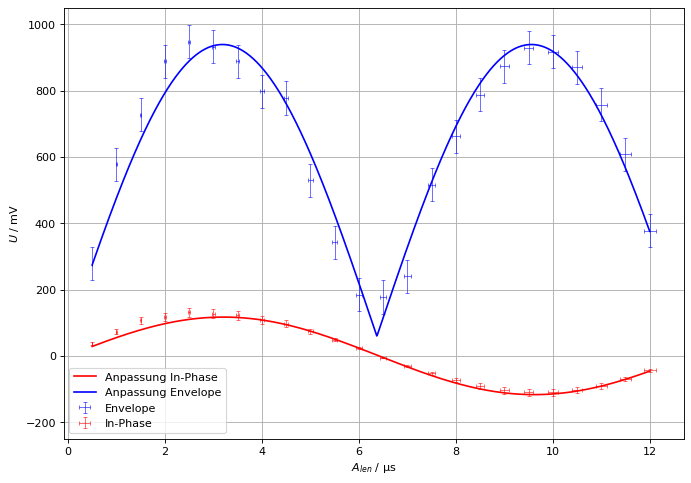

In [68]:
figure(figsize=(10,7), dpi=80)

Alen = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=0)
#Alen_raw = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=0) ##
#Alen = Alen_raw * 1e-6   # µs → seconds                           ##

uenv = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=1)
duenv = [50]*len(uenv)
ui = np.loadtxt('../data/Rabi1.txt', skiprows=1, usecols=2)
dui = abs(ui*0.1)

x=Alen
dx = 0.01*x
#dx=[0.01]*len(Alen)
print(x, dx)
y1=uenv-22.5
dy1=duenv

y2=ui-3
dy2=dui

def f(x,m,n):
    return m*np.sin(n*x)

def g(x,m,n,a):
    return a+m*np.abs(np.sin(n*x))

xplot=np.linspace(min(x), max(x), 1000)

print('=== In-Phase ===')
popt, pcov=curve_fit(f,x,y2,p0=[5,0.8],sigma=dy2,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))
plt.plot(xplot,f(xplot,*popt), color='red', label='Anpassung In-Phase')

print(*popt,perr)
print("> U_0   =", popt[0], "+-", perr[0])
print("> Omega =", popt[1]*10**6/(2*np.pi), "+-", perr[1]*10**6/(2*np.pi))

chi2 = np.sum(((y2 - f(x, *popt)) / dy2)**2)
dof = len(x) - len(popt)
print("> Chi2 =", chi2)
print("> dof =", dof)
print("> Chi2/dof =", chi2/dof)

#print(chisquare(xplot,f_exp=f(xplot,*popt)))


print('\n=== Envelope ===')
popt, pcov=curve_fit(g,x,y1,p0=[1.3,0.87,3],sigma=dy1,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))
plt.plot(xplot,g(xplot,*popt), color='blue', label='Anpassung Envelope')

print(*popt,perr)
print("> m/U_0   =", popt[0], "+-", perr[0])
print("> n/Omega =", popt[1]*10**6/(2*np.pi), "+-", perr[1]*10**6/(2*np.pi))
print("> a       =", popt[2], "+-", perr[2])
chi2 = np.sum(((y1 - g(x, *popt)) / dy1)**2)
dof = len(x) - len(popt)
print("> Chi2 =", chi2)
print("> dof =", dof)
print("> Chi2/dof =", chi2/dof)

#print(chisquare(xplot,f_exp=g(xplot,*popt)))


plt.errorbar(x,y1,xerr=dx,yerr=dy1, ls='none', capsize=2,elinewidth=0.5, capthick=0.5, color='blue',label='Envelope')
plt.errorbar(x,y2,xerr=dx,yerr=dy2, ls='none', capsize=2,elinewidth=0.5, capthick=0.5, color='red',label='In-Phase')

#test = 59.19948+879.47666*np.abs(np.sin(-0.49205*xplot))
#plt.plot(xplot, test)

plt.grid(which='minor')
plt.grid(which='major')
#plt.loglog()
plt.ylim(-250,1050)
plt.xlabel(r'$A_{len}$ / $\mathrm{\mu s}$')
plt.ylabel(r'$U$ / mV')
plt.tight_layout
plt.legend(loc='lower left')
plt.savefig('../plots/Rabi.pdf')